In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# own imports
import matplotlib.pyplot as plt

In [3]:
# batch1 = pickle.load(open(r'.\Data\batch1.pkl', 'rb'))   # orig
batch1 = pickle.load(open(r'./Data/batch1.pkl', 'rb'))    # Wendy
#batch1 = pickle.load(open(r'/media/hannes/TOSHIBA EXT/matlab/batch1.pkl', 'rb'))  # Hannes

#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [4]:
numBat1 = len(batch1.keys())
numBat1

41

In [7]:
batch1.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])

# 1 Cell

In [107]:
# this is all data for cell 0 from batch 1
# The cleaned data set from all 3 batches contains 124 cells
batch1["b1c0"].keys() 

dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])

## Dict structure
1. Cell<br>
    1.1 Cycle Life<br>
    1.2 Charge Policy<br>
    1.3 Summary (per charging cycle)
        1.3.1 Internal Resistance (Ohm)
        1.3.2 Quantity of Charge (Ah)
        1.3.3 Quantity of Discharge (Ah)
        1.3.4 Temp Avg (C°)
        1.3.5 Temp min (C°)
        1.3.6 Temp Max (C°)
        1.3.7 Charge time (minutes)
        1.3.8 Index
    1.4 Cycle (all data points per cycle)
        1.4.1 I ?
        1.4.2 Quantity of Charge (Ah)
        1.4.3 Quantity of Discharge (Ah)
        1.4.4 Qdlin ?
        1.4.5 Temperature (C°)
        1.4.6 Tdlin ?
        1.4.7 Volt
        1.4.8 dQdV ?
        1.4.9 time elapsed        

# 1.1 Cycle Life

In [30]:
batch1["b1c0"]["cycle_life"] # total number of cycles measured

array([[1190.]])

# 1.2 Charge Policy

In [11]:
batch1["b1c0"]["charge_policy"]

'3.6C(80%)-3.6C'

# 1.3 Summary (for each charging cycle)

In [12]:
batch1["b1c0"]["summary"].keys()

dict_keys(['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle'])

### 1.3.1 Internal resistance

In [52]:
batch1["b1c0"]["summary"]["IR"] # Measured in Ohm?

array([0.        , 0.01674235, 0.01672431, ..., 0.01708527, 0.01707222,
       0.0170891 ])

### 1.3.2/3 Quantity of charge/discharge

In [53]:
# Q is used to denote a quantity of electricity or charge. Measured in Ah.
batch1["b1c0"]["summary"]["QC"]
batch1["b1c0"]["summary"]["QD"] 

array([0.       , 1.0706892, 1.0719005, ..., 1.0264986, 1.0266768,
       1.0262098])

### 1.3.4/5/6 Temperature mean/min/max

In [48]:
# measured in Celcius?
batch1["b1c0"]["summary"]["Tavg"]
batch1["b1c0"]["summary"]["Tmin"]
batch1["b1c0"]["summary"]["Tmax"]

array([ 0.      , 35.652016, 35.692978, ..., 36.750278, 36.758877,
       36.561554])

### 1.3.7 Charge time

In [54]:
batch1["b1c0"]["summary"]["chargetime"] # measured in minutes?

array([ 0.        , 13.34125   , 13.42577667, ..., 13.42549833,
       13.34097167, 13.42571167])

### 1.3.8 Cycle (index)

In [50]:
batch1["b1c0"]["summary"]["cycle"] # Number/index of charging cycle

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.187e+03, 1.188e+03,
       1.189e+03])

# 1.4 Cycles

In [51]:
list(batch1["b1c0"]["cycles"].keys())[-5:-1] # For this cell they measured 1188 charging cycles

['1184', '1185', '1186', '1187']

### Get all data from one exemplary charging cycle

In [56]:
batch1["b1c0"]["cycles"]["1054"].keys()

dict_keys(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't'])

### 1.4.1/2/3 I (index), Qc (charge) and Qd (discharge)

In [82]:
# Why are I, Qc and Qd identical?
# When building the pickle all of them were set to "Qc"
#assert sorted(batch1["b1c0"]["cycles"]["1054"]["I"]) == sorted(batch1["b1c0"]["cycles"]["1054"]["Qc"])
#assert sorted(batch1["b1c0"]["cycles"]["1054"]["I"]) == sorted(batch1["b1c0"]["cycles"]["1054"]["Qd"])
batch1["b1c0"]["cycles"]["1054"]["I"]

array([0.0000000e+00, 5.9319001e-07, 5.9319001e-07, ..., 1.0357687e+00,
       1.0357687e+00, 1.0357687e+00])

### 1.4.4 Qdlin (linear charge)

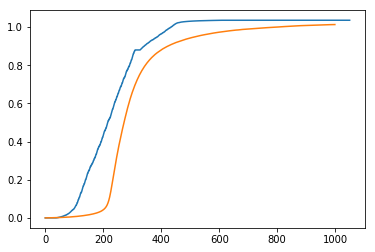

In [81]:
# Is Qdlin a smoothed out version of Qd?
plt.plot(batch1["b1c0"]["cycles"]["1054"]["Qd"], label='Qd')
plt.plot(batch1["b1c0"]["cycles"]["1054"]["Qdlin"], label='Qdlin')
plt.legend()
plt.show()

### 1.4.5 T (temperature)

In [91]:
batch1["b1c0"]["cycles"]["1054"]["T"]

array([32.275799, 32.275799, 32.275799, ..., 32.112251, 32.112251,
       32.112251])

### 1.4.6 Tdlin

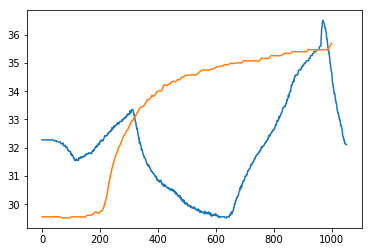

In [85]:
# Is Tdlin a smoothed out version of T? Most likely not
plt.plot(batch1["b1c0"]["cycles"]["1054"]["T"], label='T')
plt.plot(batch1["b1c0"]["cycles"]["1054"]["Tdlin"], label='Tdlin')
plt.legend()
plt.show()

### 1.4.7 V (Volt)

In [96]:
batch1["b1c0"]["cycles"]["1054"]["V"]

array([2.0175753, 2.0321321, 2.0450382, ..., 2.0015354, 2.0115385,
       2.0168495])

### 1.4.8 dQdV

In [97]:
# Delta of Q and V?
# This has len(1000), not 1051 like the other features
batch1["b1c0"]["cycles"]["1054"]["dQdV"]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.27691832e-03, -3.21159282e-03, -6.01041088e-03, -9.67337250e-03,
       -1.42004777e-02, -1.95917264e-02, -2.55824827e-02, -3.15732390e-02,
       -3.73576079e-02, -4.22778332e-02, -4.63339150e-02, -4.95258532e-02,
       -5.18536479e-02, -5.33172990e-02, -5.39168065e-02, -5.39168065e-02,
       -5.39168065e-02, -5.39168065e-02, -5.39168065e-02, -5.39168065e-02,
       -5.39168065e-02, -5.39168065e-02, -5.39168065e-02, -5.39168065e-02,
       -5.39168065e-02, -5.39168065e-02, -5.39168065e-02, -5.39168065e-02,
       -5.39168065e-02, -5.39168065e-02, -5.39168065e-02, -5.39168065e-02,
       -5.39168065e-02, -5.40146568e-02, -5.56531938e-02, -5.88324177e-02,
       -6.35523283e-02, -6.98129257e-02, -7.76142100e-02, -8.69561810e-02,
       -9.72809783e-02, -1.07605776e-01, -1.17832723e-01, -1.26518983e-01,
       -1.33664556e-01, -1.39269443e-01, -1.43333643e-01, -1.45251805e-01,
       -1.44712074e-01, -

In [168]:
# checking: dQdV always len=1000
bcc = batch1['b1c5']['cycles']
for cid, cycle in bcc.items():
    print('cid', cid, 'tl', len(cycle['t']), 'dql', len(cycle['dQdV']))

cid 0 tl 2 dql 2
cid 1 tl 1059 dql 1000
cid 2 tl 1045 dql 1000
cid 3 tl 1048 dql 1000
cid 4 tl 1059 dql 1000
cid 5 tl 1058 dql 1000
cid 6 tl 1078 dql 1000
cid 7 tl 1074 dql 1000
cid 8 tl 1062 dql 1000
cid 9 tl 1077 dql 1000
cid 10 tl 1067 dql 1000
cid 11 tl 1074 dql 1000
cid 12 tl 1060 dql 1000
cid 13 tl 1075 dql 1000
cid 14 tl 1040 dql 1000
cid 15 tl 1047 dql 1000
cid 16 tl 1083 dql 1000
cid 17 tl 1050 dql 1000
cid 18 tl 1055 dql 1000
cid 19 tl 1063 dql 1000
cid 20 tl 1076 dql 1000
cid 21 tl 1046 dql 1000
cid 22 tl 1066 dql 1000
cid 23 tl 1041 dql 1000
cid 24 tl 1068 dql 1000
cid 25 tl 1062 dql 1000
cid 26 tl 1039 dql 1000
cid 27 tl 1076 dql 1000
cid 28 tl 1070 dql 1000
cid 29 tl 1087 dql 1000
cid 30 tl 1070 dql 1000
cid 31 tl 1062 dql 1000
cid 32 tl 1076 dql 1000
cid 33 tl 1087 dql 1000
cid 34 tl 1070 dql 1000
cid 35 tl 1075 dql 1000
cid 36 tl 1056 dql 1000
cid 37 tl 1063 dql 1000
cid 38 tl 1059 dql 1000
cid 39 tl 1075 dql 1000
cid 40 tl 1066 dql 1000
cid 41 tl 1055 dql 1000
cid 42 t

cid 591 tl 1074 dql 1000
cid 592 tl 1003 dql 1000
cid 593 tl 1038 dql 1000
cid 594 tl 1051 dql 1000
cid 595 tl 1059 dql 1000
cid 596 tl 1025 dql 1000
cid 597 tl 1057 dql 1000
cid 598 tl 1040 dql 1000
cid 599 tl 1052 dql 1000
cid 600 tl 1048 dql 1000
cid 601 tl 1051 dql 1000
cid 602 tl 1030 dql 1000
cid 603 tl 1056 dql 1000
cid 604 tl 1074 dql 1000
cid 605 tl 1066 dql 1000
cid 606 tl 1023 dql 1000
cid 607 tl 1035 dql 1000
cid 608 tl 1036 dql 1000
cid 609 tl 1039 dql 1000
cid 610 tl 1060 dql 1000
cid 611 tl 1050 dql 1000
cid 612 tl 1020 dql 1000
cid 613 tl 1045 dql 1000
cid 614 tl 1041 dql 1000
cid 615 tl 1027 dql 1000
cid 616 tl 1054 dql 1000
cid 617 tl 1047 dql 1000
cid 618 tl 1045 dql 1000
cid 619 tl 1049 dql 1000
cid 620 tl 1054 dql 1000
cid 621 tl 1054 dql 1000
cid 622 tl 1075 dql 1000
cid 623 tl 1035 dql 1000
cid 624 tl 1074 dql 1000
cid 625 tl 1057 dql 1000
cid 626 tl 1072 dql 1000
cid 627 tl 1053 dql 1000
cid 628 tl 1043 dql 1000
cid 629 tl 1000 dql 1000
cid 630 tl 1006 dql 1000


cid 978 tl 939 dql 1000
cid 979 tl 980 dql 1000
cid 980 tl 998 dql 1000
cid 981 tl 965 dql 1000
cid 982 tl 977 dql 1000
cid 983 tl 996 dql 1000
cid 984 tl 976 dql 1000
cid 985 tl 992 dql 1000
cid 986 tl 1001 dql 1000
cid 987 tl 945 dql 1000
cid 988 tl 980 dql 1000
cid 989 tl 1001 dql 1000
cid 990 tl 974 dql 1000
cid 991 tl 963 dql 1000
cid 992 tl 994 dql 1000
cid 993 tl 962 dql 1000
cid 994 tl 1004 dql 1000
cid 995 tl 931 dql 1000
cid 996 tl 927 dql 1000
cid 997 tl 965 dql 1000
cid 998 tl 954 dql 1000
cid 999 tl 972 dql 1000
cid 1000 tl 997 dql 1000
cid 1001 tl 969 dql 1000
cid 1002 tl 938 dql 1000
cid 1003 tl 970 dql 1000
cid 1004 tl 958 dql 1000
cid 1005 tl 947 dql 1000
cid 1006 tl 967 dql 1000
cid 1007 tl 983 dql 1000
cid 1008 tl 960 dql 1000
cid 1009 tl 1008 dql 1000
cid 1010 tl 998 dql 1000
cid 1011 tl 989 dql 1000
cid 1012 tl 977 dql 1000
cid 1013 tl 986 dql 1000
cid 1014 tl 957 dql 1000
cid 1015 tl 959 dql 1000
cid 1016 tl 964 dql 1000
cid 1017 tl 960 dql 1000
cid 1018 tl 979 dq

In [169]:
# dQ/dV over t ?_?
plt.plot(batch1['b1c43']['cycles']['10']['t'][0:1000], batch1['b1c43']['cycles']['10']['dQdV'])

In [104]:
# dQdV, Qdlin:  what is the relationship between these two?
plt.plot(batch1['b1c43']['cycles']['10']['Qdlin'], label='Qdlin')
plt.plot(batch1['b1c43']['cycles']['10']['dQdV'], label='dQdV')
plt.legend()
plt.show()

In [173]:
# Qc & Qd
plt.plot(bat_dict['b1c43']['cycles']['10']['t'], bat_dict['b1c43']['cycles']['10']['Qc'], label='Qc')
plt.plot(bat_dict['b1c43']['cycles']['10']['t'], bat_dict['b1c43']['cycles']['10']['Qd'], label='Qd')
plt.xlabel('time (0.1 minutes)')
plt.ylabel('charge (coulombs)')  # 1C = 1A * 1s,  1 Coulomb = constant current of 1 Ampere in 1 second
plt.legend()
plt.show()

### 1.4.9 t (time)

In [106]:
# time elapsed at each step
# measured in minutes?
batch1["b1c0"]["cycles"]["1054"]["t"]

array([0.00000000e+00, 2.56166667e-03, 3.01666667e-03, ...,
       5.11831683e+01, 5.11938200e+01, 5.11998900e+01])

In [83]:
#len(batch1["b1c0"]['cycles']['10']['dQdV'])  # len 1189, keys ['cycle_life', 'charge_policy', 'summary', 'cycles']
batch1["b1c0"]['cycles']['1']['V']

array([2.0264158, 2.0393877, 2.0516596, ..., 2.0124063, 2.0224609,
       2.0250397])

# Continue original notebook

In [4]:
# batch2 = pickle.load(open(r'/media/hannes/TOSHIBA EXT/matlab/batch2.pkl','rb'))
# batch2 = pickle.load(open(r'.\Data\batch2.pkl','rb'))
batch2 = pickle.load(open(r'./Data/batch2.pkl', 'rb'))    # Wendy

In [5]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [6]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [7]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [8]:
numBat2 = len(batch2.keys())
numBat2

43

In [9]:
# batch3 = pickle.load(open(r'.\Data\batch3.pkl','rb'))
# batch3 = pickle.load(open(r'/media/hannes/TOSHIBA EXT/matlab/batch3.pkl','rb'))
batch3 = pickle.load(open(r'./Data/batch3.pkl', 'rb'))    # Wendy

# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

In [10]:
numBat3 = len(batch3.keys())
numBat3

40

In [11]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [12]:
bat_dict = {**batch1, **batch2, **batch3}

Text(0, 0.5, 'Discharge Capacity (Ah)')

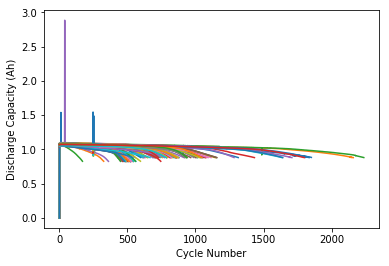

In [13]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

### Train and Test Split
If you are interested in using the same train/test split as the paper, use the indices specified below

In [14]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);